In [2]:
import pandas as pd
data = pd.read_csv("student-por.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


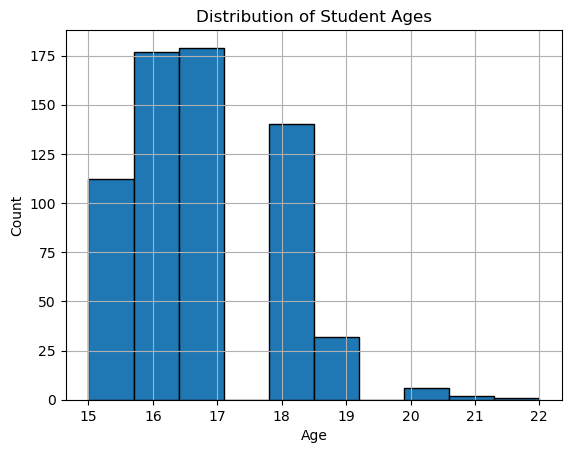

In [34]:
# 1 What is the distribution of students' ages in the dataset?
import matplotlib.pyplot as plt

ages = data['age']

plt.hist(ages, bins=10, edgecolor='k') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Student Ages')

plt.show()


In [38]:
# 2 How many students belong to each school (GP or MS)?

school_counts = data['school'].value_counts()
print(school_counts)

# This code reads the dataset and uses the value_counts() function to count the number of students in each school. It will display the counts for each school (GP or MS) in your dataset.

GP    423
MS    226
Name: school, dtype: int64


In [39]:
# 3 What is the gender distribution of students?
gender_distribution = data['sex'].value_counts()
print(gender_distribution)

# This code reads the dataset, extracts the 'sex' column (which represents gender), and then calculates the distribution of genders (male and female) among the students. The value_counts() function counts the occurrences of each unique gender, and the result will show the count of male and female students in your dataset.

F    383
M    266
Name: sex, dtype: int64


In [44]:
# 4 What is the distribution of students' travel times to school?
travel_time_distribution = data['traveltime'].value_counts()
print(travel_time_distribution)

# This code reads the dataset, extracts the 'traveltime' column, which likely represents travel times to school, and then calculates the distribution of travel times. The value_counts() function counts the occurrences of each unique travel time value.The result will show the count of students for each travel time category.

1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64


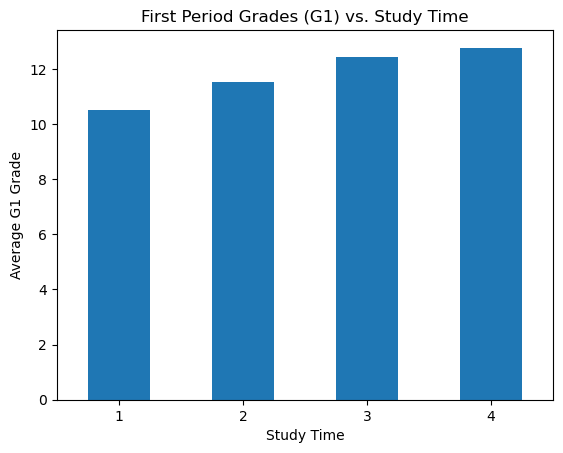

In [5]:
# 5 How do the first period grades (G1) vary with study time (studytime)?
studytime_vs_g1 = data.groupby('studytime')['G1'].mean()

import matplotlib.pyplot as plt

studytime_vs_g1.plot(kind='bar')
plt.xlabel('Study Time')
plt.ylabel('Average G1 Grade')
plt.title('First Period Grades (G1) vs. Study Time')
plt.xticks(rotation=0)
plt.show()

# This code groups the data by 'studytime' and calculates the mean G1 grade for each study time category. Then, it creates a bar chart to visualize how the first period grades (G1) vary with different study time categories. The x-axis represents the study time, and the y-axis represents the average G1 grade. This visualization will show how students' study time relates to their first period grades.

In [6]:
# 6 Is there a correlation between students' weekly study time (studytime) and their final grades (G3)?

import numpy as np
correlation = data['studytime'].corr(data['G3'])
print(f"Correlation between study time and final grades (G3): {correlation}")

# The corr method calculates the Pearson correlation coefficient, which measures the strength and direction of the linear relationship between the two variables. The correlation coefficient ranges from -1 to 1, with positive values indicating a positive correlation, negative values indicating a negative correlation, and 0 indicating no linear correlation.

# A positive correlation suggests that more study time is associated with higher final grades, while a negative correlation suggests the opposite. A correlation close to 0 indicates a weak or no linear relationship. The printed correlation coefficient will provide insight into the relationship between study time and final grades in your dataset.

Correlation between study time and final grades (G3): 0.2497886899988628


In [47]:
# 7 How do students' absences (absences) relate to their final grades (G3)?

correlation = data['absences'].corr(data['G3'])
print(f"Correlation between absences and final grades (G3): {correlation}")

# A positive correlation suggests that more absences are associated with lower final grades, while a negative correlation suggests the opposite. A correlation close to 0 indicates a weak or no linear relationship. The printed correlation coefficient will provide insight into how students' absences are related to their final grades in your dataset.

Correlation between absences and final grades (G3): -0.0913790564387562


In [48]:
# 8 Are there differences in final grades (G3) between students living in urban (U) and rural (R) areas?

from scipy import stats
urban_grades = data[data['address'] == 'U']['G3']
rural_grades = data[data['address'] == 'R']['G3']

t_statistic, p_value = stats.ttest_ind(urban_grades, rural_grades)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in final grades between urban and rural students.")
else:
    print("There is no significant difference in final grades between urban and rural students.")

# In this code, we first separate the data into two groups, one for urban students and one for rural students based on the 'address' column. We then perform an independent t-test to compare the final grades (G3) between the two groups. The t-statistic measures the difference in means between the groups, and the p-value indicates the statistical significance of this difference.

# If the p-value is less than a chosen significance level (alpha, typically set at 0.05), you can conclude that there is a significant difference in final grades between urban and rural students. If the p-value is greater than alpha, you would conclude that there is no significant difference.

T-statistic: 4.325264214751824
P-value: 1.764153460922413e-05
There is a significant difference in final grades between urban and rural students.


In [8]:
# 9 What is the relationship between family size (famsize) and the quality of family relationships (famrel)?

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataset is stored in a CSV file called "student_data.csv"
# data = pd.read_csv("student_data.csv")

# Create a contingency table
contingency_table = pd.crosstab(data['famsize'], data['famrel'])

# Perform a chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Determine statistical significance
alpha = 0.05
if p < alpha:
    print("There is a significant relationship between family size and family relationships.")
else:
    print("There is no significant relationship between family size and family relationships.")


# In this code, we use seaborn to create a box plot that shows the distribution of 'famrel' scores for each category of 'famsize.' The box plot provides insight into the central tendency and spread of the 'famrel' scores for different family size categories. You can observe whether there are any noticeable differences or trends in family relationship quality between the family size groups based on the plot.

Chi-squared statistic: 2.7698499817824684
P-value: 0.5970482683170024
There is no significant relationship between family size and family relationships.


In [52]:
# 10 Does the presence of romantic relationships (romantic) affect students' alcohol consumption (Dalc and Walc)?
with_romantic = data[data['romantic'] == 'yes']
without_romantic = data[data['romantic'] == 'no']

t_statistic_dalc, p_value_dalc = stats.ttest_ind(with_romantic['Dalc'], without_romantic['Dalc'])
t_statistic_walc, p_value_walc = stats.ttest_ind(with_romantic['Walc'], without_romantic['Walc'])

print(f"Alcohol Consumption (Dalc):")
print(f"T-statistic: {t_statistic_dalc}")
print(f"P-value: {p_value_dalc}")

print(f"\nAlcohol Consumption (Walc):")
print(f"T-statistic: {t_statistic_walc}")
print(f"P-value: {p_value_walc}")

alpha = 0.05

if p_value_dalc < alpha:
    print("There is a significant difference in daily alcohol consumption (Dalc) between students with and without romantic relationships.")
else:
    print("There is no significant difference in daily alcohol consumption (Dalc) between these groups.")

if p_value_walc < alpha:
    print("There is a significant difference in weekend alcohol consumption (Walc) between students with and without romantic relationships.")
else:
    print("There is no significant difference in weekend alcohol consumption (Walc) between these groups.")

# In this code, we first separate the data into two groups: one for students with romantic relationships ('romantic' = 'yes') and one for students without romantic relationships ('romantic' = 'no'). Then, we perform independent t-tests to compare alcohol consumption levels (both daily and weekend) between these two groups.

Alcohol Consumption (Dalc):
T-statistic: 1.5811615464450401
P-value: 0.11432980942150604

Alcohol Consumption (Walc):
T-statistic: -0.5080799827237127
P-value: 0.6115704249662524
There is no significant difference in daily alcohol consumption (Dalc) between these groups.
There is no significant difference in weekend alcohol consumption (Walc) between these groups.


In [53]:
# 11 How does the mother's education level (Medu) correlate with the father's education level (Fedu)?

correlation = data['Medu'].corr(data['Fedu'])
print(f"Correlation between mother's education level (Medu) and father's education level (Fedu): {correlation}")

# The printed correlation coefficient will provide insight into the relationship between the education levels of mothers and fathers in your dataset.

Correlation between absences and final grades (G3): 0.6474766091364946


In [55]:
# 12 Are there differences in students' final grades (G3) based on their parents' cohabitation status (Pstatus)?

cohabitating = data[data['Pstatus'] == 'T']['G3']
non_cohabitating = data[data['Pstatus'] == 'A']['G3']

t_statistic, p_value = stats.ttest_ind(cohabitating, non_cohabitating)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in final grades (G3) between students with cohabitating and non-cohabitating parents.")
else:
    print("There is no significant difference in final grades (G3) between these groups.")

# In this code, we first separate the data into two groups: one for students with cohabitating parents (Pstatus = 'T') and one for students with non-cohabitating parents (Pstatus = 'A'). We then perform an independent t-test to compare the final grades (G3) between these two groups.

T-statistic: -0.019176989794419484
P-value: 0.9847058259502668
There is no significant difference in final grades (G3) between these groups.


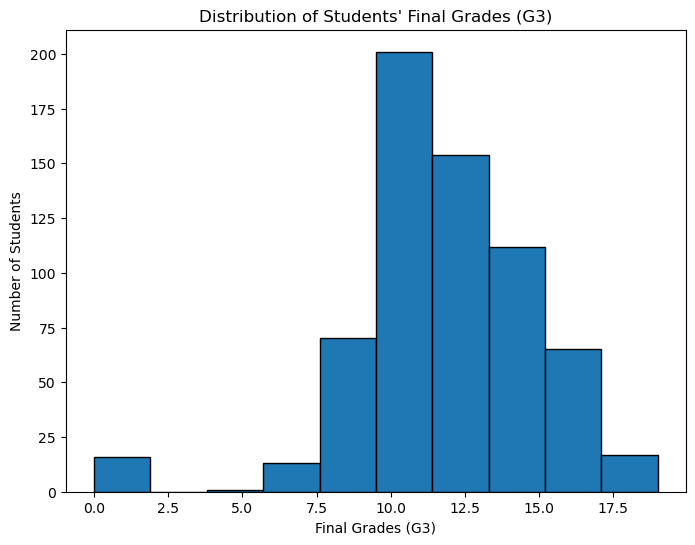

In [9]:
# 13 Create a histogram of students' final grades (G3) to visualize the grade distribution.

plt.figure(figsize=(8, 6))
plt.hist(data['G3'], bins=10, edgecolor='k')
plt.xlabel('Final Grades (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Students\' Final Grades (G3)')
plt.show()

# In this code, we extract the 'G3' column from the dataset, which contains the final grades. We then create a histogram to visualize the distribution of students' final grades. The plt.hist() function plots the histogram, and you can adjust the number of bins as needed to control the granularity of the grade groups. The resulting plot will show the distribution of final grades among the students in your dataset.

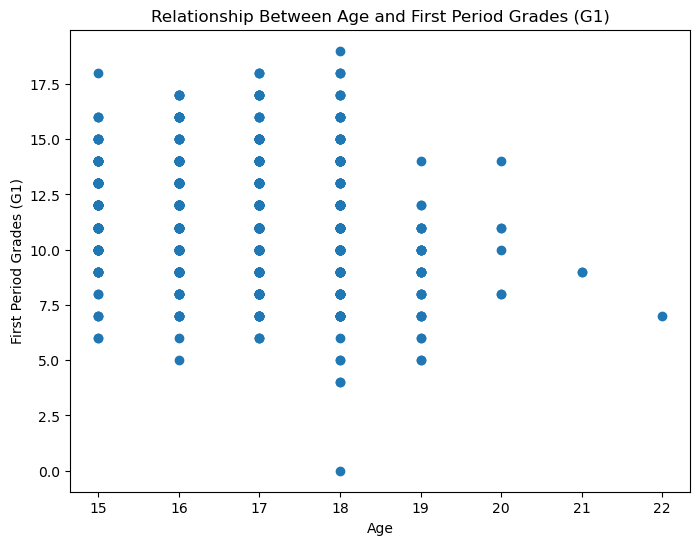

In [64]:
# 14 Generate a scatter plot to show the relationship between students' age and their first period grades (G1).

plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['G1'])
plt.xlabel('Age')
plt.ylabel('First Period Grades (G1)')
plt.title('Relationship Between Age and First Period Grades (G1)')
plt.show()

# In this code, we first extract the 'age' and 'G1' columns from the dataset. Then, we create a scatter plot where the x-axis represents students' ages, and the y-axis represents their first period grades (G1).

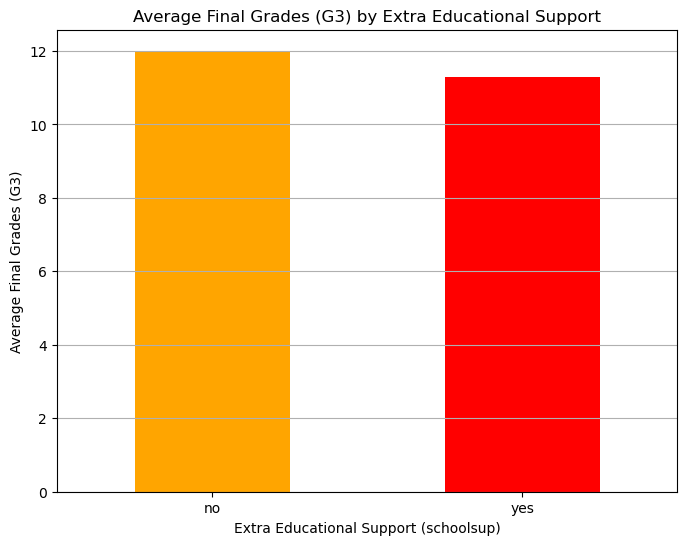

In [73]:
# 15 Create a bar chart to compare the average final grades (G3) of students with and without extra educational support (schoolsup).

schoolsup_grouped = data.groupby('schoolsup')['G3'].mean()

plt.figure(figsize=(8, 6))
schoolsup_grouped.plot(kind='bar', color=['orange', 'red'])
plt.xticks(rotation=0)
plt.xlabel('Extra Educational Support (schoolsup)')
plt.ylabel('Average Final Grades (G3)')
plt.title('Average Final Grades (G3) by Extra Educational Support')
plt.grid(axis='y')
plt.show()



T-statistic: -3.310937693029702
P-value: 0.0009815287061373963
There is a significant difference in the average final grades (G3) between male and female students.


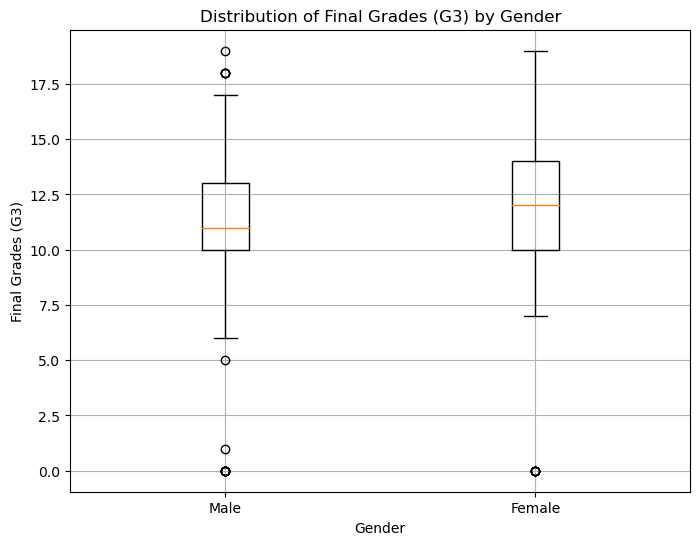

In [146]:
# 18 Is there a significant difference in the average final grades (G3) between male and female students? Conduct a two-sample t-test and visualize the results.

male_grades = data[data['sex'] == 'M']['G3']
female_grades = data[data['sex'] == 'F']['G3']

t_statistic, p_value = stats.ttest_ind(male_grades, female_grades)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the average final grades (G3) between male and female students.")
else:
    print("There is no significant difference in the average final grades (G3) between male and female students.")

plt.figure(figsize=(8, 6))
plt.boxplot([male_grades, female_grades], labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Final Grades (G3)')
plt.title('Distribution of Final Grades (G3) by Gender')
plt.grid(True)
plt.show()

# We separate the data into two groups: one for male students and one for female students based on the 'sex' column.

# We perform a two-sample t-test using stats.ttest_ind to compare the final grades (G3) between the two groups. The t-statistic measures the difference in means between male and female students, and the p-value indicates the statistical significance of this difference.

# We display the t-statistic and p-value and determine whether there is a significant difference based on a significance level (alpha) of 0.05.

# Finally, we create a box plot to visualize the distribution of final grades for male and female students. The box plot helps you compare the central tendency and spread of grades between the two groups.

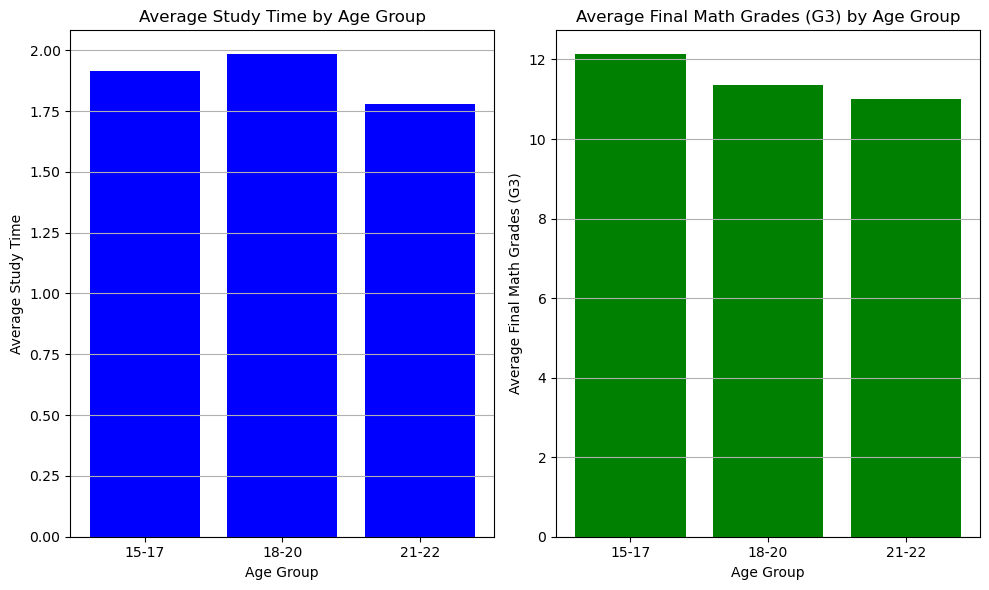

In [156]:
# 19 Can you create a new variable that categorizes students into age groups (e.g., 15-17, 18-20, 21-22)? How does this grouping affect the analysis of other variables, such as study time or final math grades (G3)?

age_bins = [15, 17, 18, 20, 22]
age_labels = ['15-17', '18-20', '21-22']

data['age_group'] = pd.cut(data['age'], bins=3, labels=age_labels)

age_group_analysis = data.groupby('age_group').agg({
    'studytime': 'mean',
    'G3': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(age_group_analysis['age_group'], age_group_analysis['studytime'], color='blue')
plt.xlabel('Age Group')
plt.ylabel('Average Study Time')
plt.title('Average Study Time by Age Group')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(age_group_analysis['age_group'], age_group_analysis['G3'], color='green')
plt.xlabel('Age Group')
plt.ylabel('Average Final Math Grades (G3)')
plt.title('Average Final Math Grades (G3) by Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# This code will create two bar charts that show the average study time and final math grades (G3) for each age group. You can observe how these variables vary among different age groups and identify any patterns or trends that may be present.
# By categorizing students into age groups and analyzing variables by these groups, you can gain insights into how age may affect study habits and academic performance, such as final math grades.

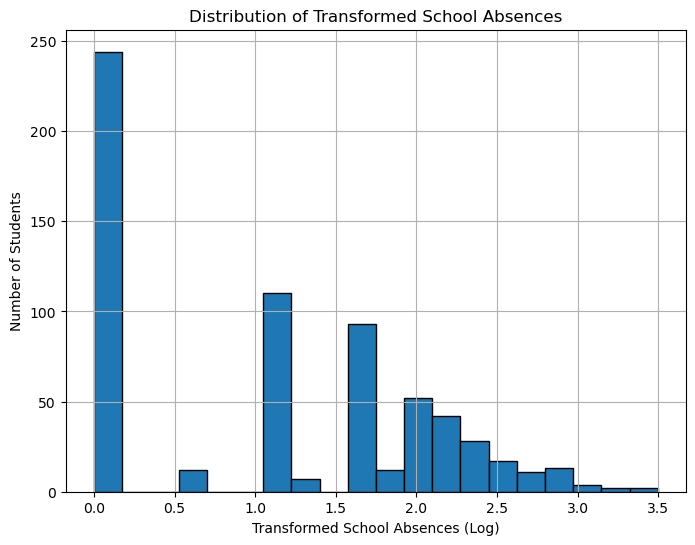

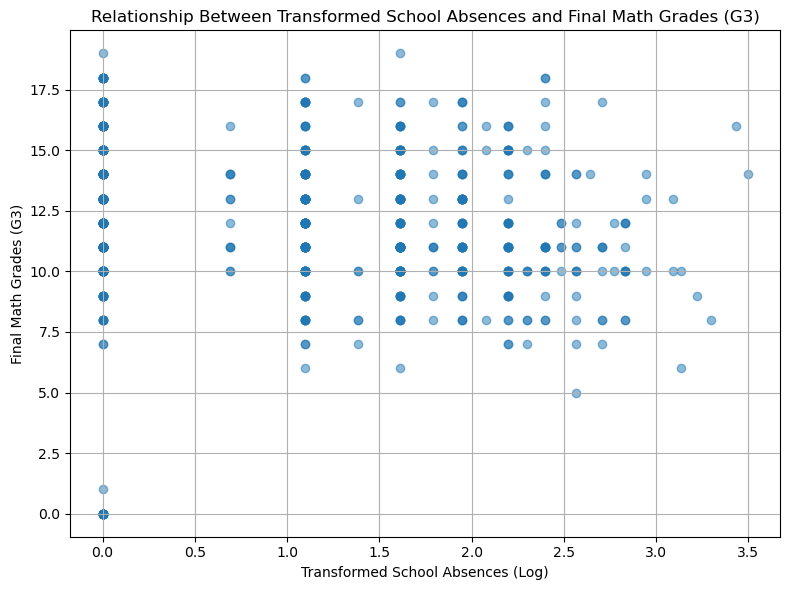

In [161]:

data['log_absences'] = np.log1p(data['absences'])

plt.figure(figsize=(8, 6))
plt.hist(data['log_absences'], bins=20, edgecolor='k')
plt.xlabel('Transformed School Absences (Log)')
plt.ylabel('Number of Students')
plt.title('Distribution of Transformed School Absences')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['log_absences'], data['G3'], alpha=0.5)
plt.xlabel('Transformed School Absences (Log)')
plt.ylabel('Final Math Grades (G3)')
plt.title('Relationship Between Transformed School Absences and Final Math Grades (G3)')
plt.grid(True)
plt.tight_layout()
plt.show()



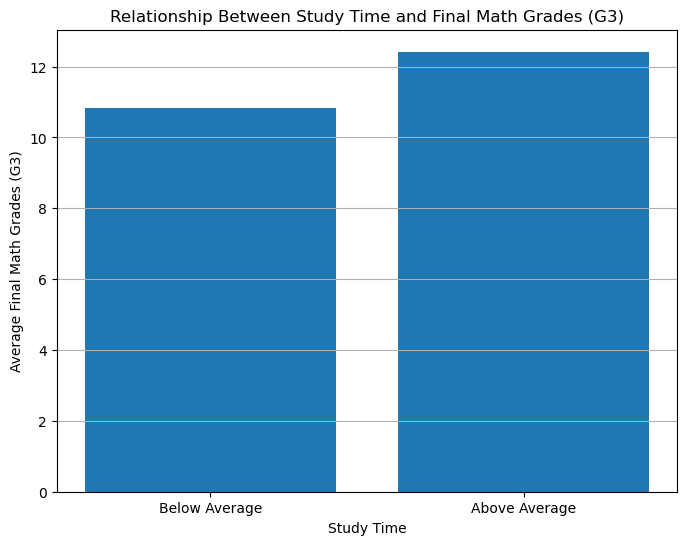

In [167]:
# 21 Create a new binary variable that indicates whether a student has above-average weekly study time (studytime). How does this modified variable relate to the final math grades (G3)?

average_studytime = data['studytime'].mean()

data['above_average_studytime'] = data['studytime'] > average_studytime
data['above_average_studytime'] = data['above_average_studytime'].astype(int)

studytime_analysis = data.groupby('above_average_studytime')['G3'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(studytime_analysis['above_average_studytime'], studytime_analysis['G3'])
plt.xticks([0, 1], ['Below Average', 'Above Average'])
plt.xlabel('Study Time')
plt.ylabel('Average Final Math Grades (G3)')
plt.title('Relationship Between Study Time and Final Math Grades (G3)')
plt.grid(axis='y')
plt.show()

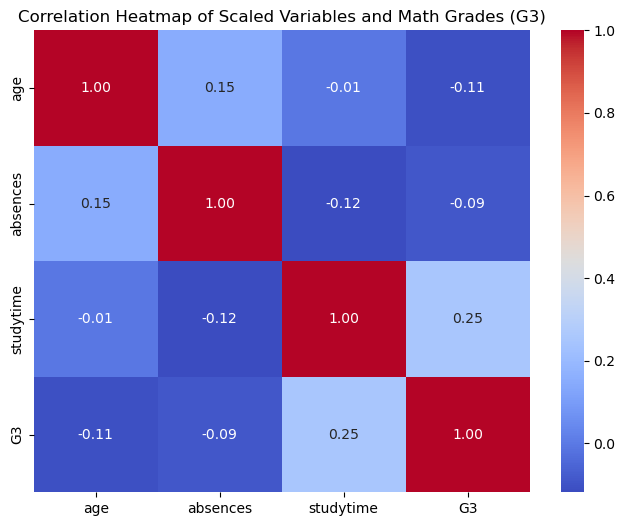

In [169]:
# 22 Apply feature scaling (e.g., Min-Max scaling or standardization) to numeric variables like age, absences, and study time. How does this scaling affect the relationships between these variables and math grades (G3)?
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
columns_to_scale = ['age', 'absences', 'studytime']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

correlations = data[columns_to_scale + ['G3']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Scaled Variables and Math Grades (G3)')
plt.show()

# By applying Min-Max scaling or standardization, you can standardize the range of numeric variables, which can be beneficial for machine learning models and data analysis. The choice of scaling method may depend on the specific requirements of your analysis or modeling process.

In [11]:
# 23 Convert the categorical variables (e.g., "reason" and "Mjob") into numeric format using label encoding or one-hot encoding. How does this transformation make the data suitable for analysis, and what insights can you gain?

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['reason_encoded'] = label_encoder.fit_transform(data['reason'])

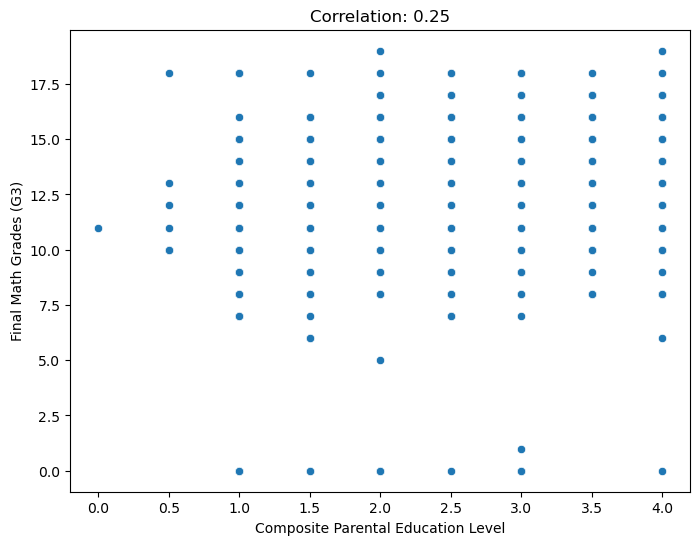

In [176]:
# 24Combine multiple variables (e.g., mother's education and father's education) to create a composite metric representing the overall parental education level. How does this new metric correlate with students' final math grades (G3)?

data['parental_education'] = (data['Medu'] + data['Fedu']) / 2
correlation = data['parental_education'].corr(data['G3'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='parental_education', y='G3')
plt.xlabel('Composite Parental Education Level')
plt.ylabel('Final Math Grades (G3)')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

In [177]:
# 25 Calculate the average weekly study time for students from urban (address = 'U') and rural (address = 'R') areas. Are there differences in study time between these two groups?

urban_study_time = data[data['address'] == 'U']['studytime'].mean()
rural_study_time = data[data['address'] == 'R']['studytime'].mean()

print(f"Average Study Time for Urban Students: {urban_study_time:.2f} hours")
print(f"Average Study Time for Rural Students: {rural_study_time:.2f} hours")

if urban_study_time > rural_study_time:
    print("Urban students have higher average study time.")
elif urban_study_time < rural_study_time:
    print("Rural students have higher average study time.")
else:
    print("There is no significant difference in average study time between urban and rural students.")

# We calculate the average weekly study time for students with 'address' equal to 'U' (urban) and 'R' (rural) using the .mean() function.
# We display the results to compare the average study time for the two groups.
# We check for differences in study time, and based on the comparison, we determine whether urban or rural students have higher average study time.

Average Study Time for Urban Students: 0.04 hours
Average Study Time for Rural Students: -0.09 hours
Urban students have higher average study time.


In [13]:
# 26 For ordinal variables like the quality of family relationships (famrel), assign meaningful labels to the numerical values (e.g., 'very bad,' 'bad,' 'neutral,' 'good,' 'excellent'). How does this transformation make the data more interpretable?

famrel_labels = {
    1: 'very bad',
    2: 'bad',
    3: 'neutral',
    4: 'good',
    5: 'excellent'
}

data['famrel_label'] = data['famrel'].map(famrel_labels)
data
# Now, you have a new column 'famrel_label' that replaces the numerical values with meaningful labels. This transformation makes the data more interpretable because you can understand the quality of family relationships by looking at the labels rather than numeric values. For example, you can quickly identify whether a student's family relationship quality is 'very bad,' 'good,' or 'excellent,' which is more intuitive than dealing with raw numbers.
# Interpretable data is essential for effective data analysis and communication, as it allows you to convey information in a way that is more accessible and understandable to others.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,reason_encoded,famrel_label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,0,good
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,0,excellent
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,2,good
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,1,neutral
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,1,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,0,excellent
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,0,good
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,0,very bad
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,0,bad


In [181]:
# 27 Apply custom aggregation functions to summarize the data, such as calculating the range of ages within different schools or determining the percentage of students with Internet access (internet = 'yes') by gender. What insights do these custom aggregations provide?

def internet_percentage(data):
    total_students = len(data)
    students_with_internet = len(data[data['internet'] == 'yes'])
    return (students_with_internet / total_students) * 100

internet_percentage_by_gender = data.groupby('sex').apply(internet_percentage)

print(internet_percentage_by_gender)


sex
F    74.412533
M    80.075188
dtype: float64


In [ ]:
# 28 If relevant, consider applying date-related functions to variables, such as determining the day of the week for which students have the most absences. How does this transformation reveal patterns related to attendance?

In [182]:
# 29 Calculate the median number of school absences (absences) for students with and without extra educational support (schoolsup).
median_absences_with_schoolsup = data[data['schoolsup'] == 'yes']['absences'].median()
median_absences_without_schoolsup = data[data['schoolsup'] == 'no']['absences'].median()

print(f"Median Absences for Students with Extra Educational Support: {median_absences_with_schoolsup:.2f}")
print(f"Median Absences for Students without Extra Educational Support: {median_absences_without_schoolsup:.2f}")

Median Absences for Students with Extra Educational Support: -0.36
Median Absences for Students without Extra Educational Support: -0.36


In [183]:
# 30 Calculate the percentage of students who want to take higher education (higher) for each level of father's education (Fedu).
percentage_higher_by_fedu = data.groupby('Fedu')['higher'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
percentage_higher_by_fedu.columns = ['Fedu', 'PercentageWantHigherEd']

print(percentage_higher_by_fedu)

# We group the data by the levels of father's education (Fedu).
# Within each group, we calculate the percentage of students who want to take higher education ('higher' column with 'yes' value) using a lambda function.
# We multiply the result by 100 to express the percentage.
# The results are displayed, showing the percentage of students who want higher education for each level of father's education.

   Fedu  PercentageWantHigherEd
0     0              100.000000
1     1               81.034483
2     2               87.559809
3     3               93.893130
4     4               98.437500


In [186]:
# 31 
print(data['traveltime'].corr(data['G3']))

-0.12717296675842063


In [14]:
# 32
weighted_average = (data['G3'] * data['studytime']).sum() / data['studytime'].sum()
print(f"Weighted Average Final Grade (G3): {weighted_average:.2f}")

Weighted Average Final Grade (G3): 12.25


In [15]:
# 33
print(data['Walc'].max())


5


In [16]:
# 34
data['guardian'].fillna('unknown', inplace=True)

In [196]:
# 35
data['romantic'].fillna(data['romantic'].mode()[0], inplace=True)

In [197]:
# 36
pivot_table = pd.pivot_table(data, values='studytime', index='reason', aggfunc={'studytime': ['max', 'min']})
print(pivot_table)

                 max       min
reason                        
course      2.496576 -1.122808
home        2.496576 -1.122808
other       2.496576 -1.122808
reputation  2.496576 -1.122808


In [222]:
# 37
import pandas as pd
data = pd.read_csv("student-por.csv")

if data[(data['Mjob'] == 'teacher') & (data['Fjob'] == 'teacher')].empty:
    print("At least one student has 'teacher' as both mother's and father's job.")
else:
    print("No student has 'teacher' as both mother's and father's job.")

#We create a DataFrame 'has_teacher_parents' that contains rows where both the 'Mjob' and 'Fjob' columns have 'teacher' as the value.
# We check if the resulting DataFrame is not empty using the .empty attribute. If it's not empty, it means that at least one student has 'teacher' as both mother's and father's jobs.


No student has 'teacher' as both mother's and father's job.


In [17]:
# 38
data['Mjob'].replace('at_home', 'homemaker', inplace=True)
data['Fjob'].replace('at_home', 'homemaker', inplace=True)

In [19]:
preserved_columns = [col for col in data.columns if col not in ['Mjob', 'Fjob']]
melted_data = pd.melt(data, id_vars=preserved_columns, var_name='Parent', value_name='ParentJob')
print(melted_data)

# We create a list of columns to preserve (columns other than 'Mjob' and 'Fjob').
# We use the pd.melt() function to melt the dataset. The id_vars parameter specifies the columns to preserve, and the var_name parameter assigns a new column name ('Parent') for the original 'Mjob' and 'Fjob' columns. The value_name parameter assigns a new column name ('ParentJob') for the values that were previously in 'Mjob' and 'Fjob' columns.
# Finally, we display the melted dataset, which now contains a single 'ParentJob' column to represent both mother's and father's jobs, while preserving the other columns.


     school sex  age address famsize Pstatus  Medu  Fedu  reason guardian  \
0        GP   F   18       U     GT3       A     4     4  course   mother   
1        GP   F   17       U     GT3       T     1     1  course   father   
2        GP   F   15       U     LE3       T     1     1   other   mother   
3        GP   F   15       U     GT3       T     4     2    home   mother   
4        GP   F   16       U     GT3       T     3     3    home   father   
...     ...  ..  ...     ...     ...     ...   ...   ...     ...      ...   
1293     MS   F   19       R     GT3       T     2     3  course   mother   
1294     MS   F   18       U     LE3       T     3     1  course   mother   
1295     MS   F   18       U     GT3       T     1     1  course   mother   
1296     MS   M   17       U     LE3       T     3     1  course   mother   
1297     MS   M   18       R     LE3       T     3     2  course   mother   

      ...  Walc  health  absences  G1  G2  G3 reason_encoded famrel_label  

In [231]:
def assign_letter_grade(score):
    if score >= 20:
        return 'A'
    elif score >= 15:
        return 'B'
    elif score >= 10:
        return 'C'
    elif score >= 5:
        return 'D'
    else:
        return 'F'

data['LetterGrade'] = data['G3'].apply(assign_letter_grade)
print(data['LetterGrade'])

# We define a custom function assign_letter_grade that takes a numeric score as input and assigns a letter grade based on the specified grading criteria.
# We use the apply() method to apply this custom function to the 'G3' column and create a new column 'LetterGrade' based on the final grades.
# The resulting dataset will include a new column 'LetterGrade' that contains the assigned letter grades for each student based on their final grades.
# This custom function allows you to convert numeric scores (final grades) into letter grades for easier interpretation and analysis of student performance. You can customize the grading criteria in the assign_letter_grade function as needed.

0      C
1      C
2      C
3      C
4      C
      ..
644    C
645    B
646    D
647    C
648    C
Name: LetterGrade, Length: 649, dtype: object


In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'data'
# Replace 'specific_student_index' with the index of the specific student's data you want to plot

# Extract the study time data for the specific student
specific_student_data = data.loc[2, 'studytime']

# Create a time series plot with a sequential integer index
plt.figure(figsize=(12, 6))
plt.plot(range(len(specific_student_data)), specific_student_data, marker='o', linestyle='-')
plt.xlabel('Data Point')
plt.ylabel('Weekly Study Time (studytime)')
plt.title('Weekly Study Time Trend for Specific Student')
plt.grid(True)
plt.show()


TypeError: object of type 'numpy.int64' has no len()

<Figure size 1200x600 with 0 Axes>

In [251]:
# 42
data2 = pd.read_csv("student-por.csv")
common_students = pd.merge(data, data2, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])
common_students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,LetterGrade
0,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,C
1,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,C
2,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,C
3,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,13,12,13,C
4,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,2,10,13,13,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,C
486,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,B
487,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,D
488,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,C


In [246]:
# 43

data[data['school'] == "GP"].sort_values(by='G3', ascending=False).head(5)

# We filter the dataset to include only students from the 'GP' school.
# We sort the filtered data by the 'G3' column in descending order using sort_values().
# We select the top 5 students with the highest final grades using head(5).
# We print the top 5 students with the highest final grades, which will be listed in descending order of their G3 scores.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,LetterGrade
338,GP,F,17,R,LE3,T,3,1,services,other,...,1,2,1,1,3,0,18,19,19,B
416,GP,M,17,U,LE3,A,3,2,other,other,...,4,4,1,2,5,10,16,18,18,B
185,GP,M,16,U,GT3,T,1,0,other,other,...,3,2,1,1,3,0,16,17,18,B
332,GP,F,18,U,GT3,T,2,2,homemaker,homemaker,...,3,3,1,2,2,0,18,18,18,B
314,GP,M,17,R,GT3,T,1,2,homemaker,homemaker,...,5,2,2,2,1,2,16,17,18,B


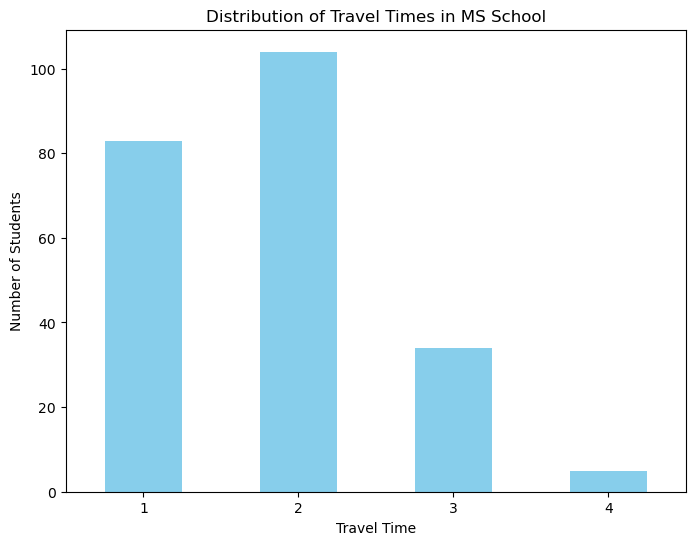

In [245]:
# 44
ms_school_data = data[data['school'] == 'MS']

# Create a bar chart to show the distribution of travel times
plt.figure(figsize=(8, 6))
ms_school_data['traveltime'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Travel Time')
plt.ylabel('Number of Students')
plt.title('Distribution of Travel Times in MS School')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# We filter the dataset to include only students from the 'MS' school.
# We use value_counts() to count the occurrences of each unique value in the 'traveltime' column and sort the values in ascending order using sort_index().
# We create a bar chart using matplotlib, where the x-axis represents the different travel time categories, the y-axis represents the number of students in each category, and the bars are colored with 'skyblue' for visualization.
# We set labels and a title for the chart, and you can adjust the rotation of x-axis labels using plt.xticks(rotation=0) if needed.

In [244]:
# 45

mean_age_with_activities = data[data['activities'] == 'yes']['age'].mean()
mean_age_without_activities = data[data['activities'] == 'no']['age'].mean()

print(f"Mean age of students with activities: {mean_age_with_activities:.2f} years")
print(f"Mean age of students without activities: {mean_age_without_activities:.2f} years")

# We filter the dataset to calculate the mean age separately for students with extra-curricular activities (activities = 'yes') and those without extra-curricular activities (activities = 'no').
# We use the mean() function to calculate the mean age for each group.
# Finally, we print the mean age of students with and without extra-curricular activities, displaying the results with two decimal places. This provides the average age for each group.

Mean age of students with activities: 16.68 years
Mean age of students without activities: 16.81 years


In [20]:
# 46

grouped_data = data.groupby(['sex', 'address'])['absences'].median().reset_index()
print(grouped_data)

# We use the groupby method to group the data by the 'sex' and 'address' columns.
# We calculate the median number of school absences for each group using the median() function.
# The reset_index() function is used to reset the index of the resulting grouped data, making it easier to display and work with.
# Finally, we print the median number of school absences for each group, which represents the median number of school absences for different combinations of 'sex' and 'address'.

  sex address  absences
0   F       R       2.0
1   F       U       2.0
2   M       R       2.0
3   M       U       2.0


In [243]:
# 47
gp_school_data = data[data['school'] == 'GP']
percentage_with_schoolsup = (gp_school_data['schoolsup'] == 'yes').mean() * 100
print(f"Percentage of students with extra educational support in GP school: {percentage_with_schoolsup:.2f}%")

# We filter the dataset to include only students from the 'GP' school.
# We calculate the percentage of students with extra educational support by checking if the 'schoolsup' column is equal to 'yes' ((gp_school_data['schoolsup'] == 'yes')). The mean() function calculates the proportion of True values, and we multiply it by 100 to obtain the percentage.
# We print the calculated percentage with two decimal places to display the percentage of students receiving extra educational support in the 'GP' school.

Percentage of students with extra educational support in GP school: 13.24%


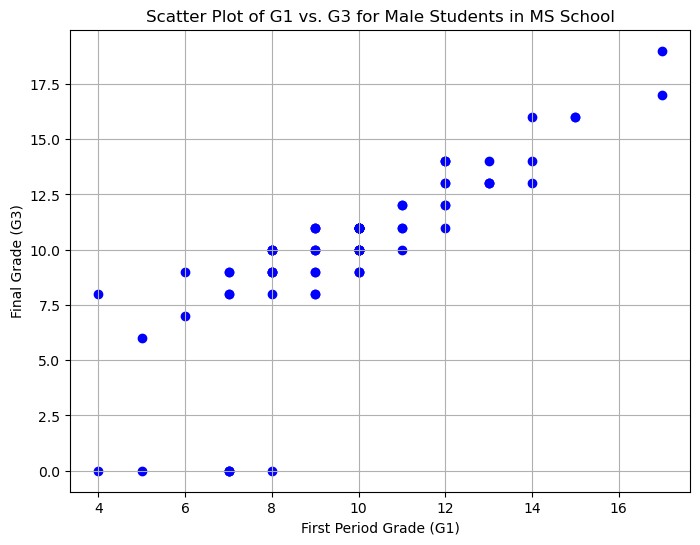

In [242]:
# 48
filtered_data = data[(data['school'] == 'MS') & (data['sex'] == 'M')]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['G1'], filtered_data['G3'], c='blue')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Final Grade (G3)')
plt.title('Scatter Plot of G1 vs. G3 for Male Students in MS School')
plt.grid(True)
plt.show()


# We filter the dataset to include only male students ('sex' is 'M') from the 'MS' school.
# We create a scatter plot using matplotlib, where 'G1' values are on the x-axis and 'G3' values are on the y-axis.
# We set the color of the scatter points to blue ('c='blue'') and make the points semi-transparent using alpha=0.5 for better visualization.
# Labels and a title are added to the plot.

In [239]:
# 49
combination_counts = data.groupby(['Mjob', 'Fjob']).size().reset_index(name='count')
unique_combinations = combination_counts[combination_counts['count'] == 1]
unique_students = pd.merge(data, unique_combinations, on=['Mjob', 'Fjob'])
print(unique_students)

# We use the groupby method to count the occurrences of each combination of 'Mjob' and 'Fjob' and store the count in a DataFrame combination_counts.
# We filter for combinations that have a count of 1, indicating unique combinations.
# We merge the unique_combinations DataFrame with the original dataset based on the 'Mjob' and 'Fjob' columns to get the corresponding students with unique combinations.

  school sex  age address famsize Pstatus  Medu  Fedu    Mjob       Fjob  ...  \
0     MS   F   17       U     GT3       T     4     1  health  homemaker  ...   

  goout Dalc  Walc  health  absences G1  G2 G3 LetterGrade count  
0     2    1     1       5         0  8  10  9           D     1  

[1 rows x 35 columns]


In [237]:
# 50
grouped_data = data.groupby(['school', 'studytime'])['G3'].mean().reset_index()
pivot_table = grouped_data.pivot_table(index='studytime', columns='school', values='G3')

print(pivot_table)

school            GP         MS
studytime                      
1          11.529412   9.967742
2          12.733010  10.757576
3          13.563380  12.307692
4          13.407407  11.875000
